In [4]:
using Plots
using HDF5
using LaTeXStrings
using LinearAlgebra
using Arpack
using FFTW

In [5]:
include("2Dincommensurate_exp_gamma.jl")

hamiltonian2d

# Set parameters

## Set atom parameters 

In [6]:
# set atom parameters 2d
X1 = [0.0;0.0]
X2 = [0.0;0.0]
s=1  
θ=π/10     # angle of rotation
L=2
A1=[1 0; 0 1]  
R1 =L*A1     #   sheet 1
A2=[cos(θ) cos(θ+π/2); sin(θ) sin(θ+π/2)] 
R2 =L*A2   # sheet 1 is rotated by θ=π/10
v(x,y)=s*((cos((π/L)*x))^2)*((cos((π/L)*y))^2)
v1(x,y)=v((A1*[x;y])[1],(A1*[x;y])[2])
v2(x,y)=v((A2*[x;y])[1],(A2*[x;y])[2])
#v1(x,y)=s1*(cos(π*(A1*[x;y])[1]))^2*(cos(π*(A1*[x;y])[2]))^2  
#v2(x,y)=s2*(cos(π*(A2*[x;y])[1]))^2*(cos(π*(A2*[x;y])[2]))^2 
B1,B2=reciprocal(R1,R2)
atoms= TwoLayerIn2D(R1=R1, R2=R2,B1=B1,B2=B2,v1=v1, v2=v2,θ=θ, X1=X1, X2=X2)

TwoLayerIn2D([2.0 0.0; 0.0 2.0], [1.902113032590307 -0.6180339887498947; 0.6180339887498948 1.9021130325903073], [3.141592653589793 0.0; 0.0 3.141592653589793], [2.987832164741556 -0.9708055193627332; 0.970805519362733 2.9878321647415556], v1, v2, 0.3141592653589793, [0.0, 0.0], [0.0, 0.0])

In [7]:
# area of the reciprocal unit cell
RS1 = sqrt( norm(B1[:,1])^2 * norm(B1[:,2])^2 - dot(B1[:,1], B1[:,2])^2 ) 
RS2 = sqrt( norm(B2[:,1])^2 * norm(B2[:,2])^2 - dot(B2[:,1], B2[:,2])^2 )

9.869604401089356

In [8]:
Coe=RS1*RS2*π/4

76.50492119632032

## Set the model parameters 

In [9]:
# set the model parameters
EcL = 20.0
EcW = 5.0
neigs=10
nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
γ=0.01
#h = (2.0*π/L1) / nk
#τ=0.01      # semi-implicit method  using τ in assmble H 
#kpoint = range(0.0, 2*π/L1-h, length=Nk)
kpts=[0.0 0.0;0.0 0.0]
model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)     

pwIncommensurate2D(20.0, 5.0, [0.0 0.0; 0.0 0.0], 48, 48, 10, 0.01)

In [10]:
kpoint=[0.0 0.0; 0.0 0.0]
kpts = [kpoint[i] for i=1:size(kpoint,2)]

2-element Array{Float64,1}:
 0.0
 0.0

In [11]:
kpts

2-element Array{Float64,1}:
 0.0
 0.0

# Hamiltonian

In [12]:
# hamiltonian
H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);

 EcutL = 20.0; EcutW = 5.0; DOF = 253


# Test function

## Gaussian  $g(x)=e^{(-(x-ϵ)^2/(2σ^2))}/(\sqrt(2π)*σ)$

In [13]:
#g(x)=exp(-(x-ϵ)^2/(2σ^2))*1/(sqrt(2π)*σ)

In [14]:
#test function Gaussian fucntion
#σ=1
#ϵ=5
g_gauss_sigma1mu5(x)=exp(-(x-5)^2/2)*1/(sqrt(2π)*1)

g_gauss_sigma1mu5 (generic function with 1 method)

In [15]:
#σ=1
#ϵ=10
g_gauss_sigma1mu10(x)=exp(-(x-10)^2/2)*1/(sqrt(2π)*1)

g_gauss_sigma1mu10 (generic function with 1 method)

In [16]:
#σ=10
#ϵ=10
g_gauss_sigma10mu10(x)=exp(-(x-10)^2/(2*10^2))*1/(sqrt(2π)*10)

g_gauss_sigma10mu10 (generic function with 1 method)

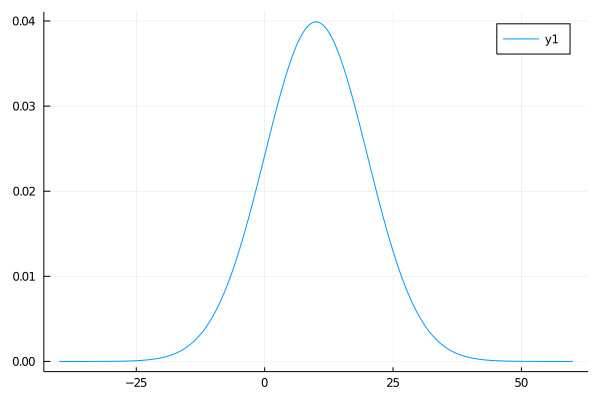

In [15]:
nx=200
gridsx = range(10-50,10+50, length = nx)
x=zeros(Float64,nx)
y=zeros(Float64,nx)
for i=1:nx
    x[i]=gridsx[i]
end
for i=1:nx
    y[i]=g_gauss_sigma10mu10(x[i])
end
plot(x,y)

## Fermi-Dirac  

In [16]:
#β=1
#μ=5
g_fermi_beta1mu5(x)=(1+exp((x-5)*1))^(-1)

g_fermi_beta1mu5 (generic function with 1 method)

In [17]:
#β=1
#μ=10
g_fermi_beta1mu10(x)=(1+exp((x-10)*1))^(-1)

g_fermi_beta1mu10 (generic function with 1 method)

In [18]:
#β=0.2
#μ=10
g_fermi_beta02mu10(x)=(1+exp((x-10)*0.2))^(-1)

g_fermi_beta02mu10 (generic function with 1 method)

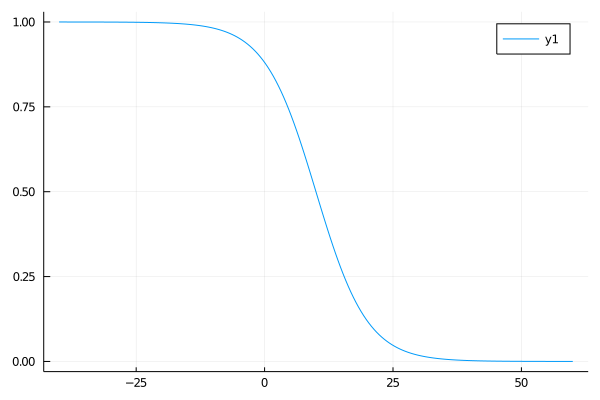

In [19]:
nx=200
gridsx = range(10-50,10+50, length = nx)
x=zeros(Float64,nx)
y=zeros(Float64,nx)
for i=1:nx
    x[i]=gridsx[i]
end
for i=1:nx
    y[i]=g_fermi_beta02mu10(x[i])
end
Plots.plot(x,y)

# Test W convergence

## Wratio=1.1, lengthW=13, L=2:4:50

# $\gamma=0.01$ different test functions

## Save H5 file EcL=30, different EcW

### EcW=5 

In [20]:
    EcL =30
    EcW = 5
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 5.0; DOF = 593


In [21]:
h5open("2Deigenvalue_gamma001_L30W5.h5", "w") do file
  write(file,"D_L30W5",D)
end

### EcW=10 

In [22]:
    EcL =30
    EcW = 10
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 10.0; DOF = 2297


In [23]:
h5open("2Deigenvalue_gamma001_L30W10.h5", "w") do file
  write(file,"D_L30W10",D)
end

### EcW=15 

In [24]:
    EcL =30
    EcW = 15
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 15.0; DOF = 5101


In [25]:
h5open("2Deigenvalue_gamma001_L30W15.h5", "w") do file
  write(file,"D_L30W15",D)
end

### EcW=20 

In [26]:
    EcL =30
    EcW = 20
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 20.0; DOF = 9117


In [27]:
h5open("2Deigenvalue_gamma001_L30W20.h5", "w") do file
  write(file,"D_L30W20",D)
end

### EcW=25 

In [28]:
    EcL =30
    EcW = 25
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 25.0; DOF = 14261


In [29]:
h5open("2Deigenvalue_gamma001_L30W25.h5", "w") do file
  write(file,"D_L30W25",D)
end

### EcW=30 

In [30]:
    EcL =30
    EcW = 30
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 30.0; DOF = 20529


In [31]:
h5open("2Deigenvalue_gamma001_L30W30.h5", "w") do file
  write(file,"D_L30W30",D)
end

### EcW=35 

In [32]:
    EcL =30
    EcW = 35
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 30.0; EcutW = 35.0; DOF = 27857


In [33]:
h5open("2Deigenvalue_gamma001_L30W35.h5", "w") do file
  write(file,"D_L30W35",D)
end

### EcW=50

In [ ]:
    EcL =30
    EcW = 50
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

In [ ]:
h5open("2Deigenvalue_gamma001_L30W50.h5", "w") do file
  write(file,"D_L30W50",D)
end

### EcW=60 

In [17]:
    EcL =20
    EcW = 60
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

 EcutL = 20.0; EcutW = 60.0; DOF = 36493


In [18]:
h5open("2Deigenvalue_gamma001_L20W60.h5", "w") do file
  write(file,"D_L20W60",D)
end

### EcW=80 

In [ ]:
    EcL =30
    EcW = 80
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);

In [ ]:
h5open("2Deigenvalue_gamma001_L30W80.h5", "w") do file
  write(file,"D_L30W80",D)
end

In [59]:
Wstep=5
lengthW=7
vecEcW=zeros(Int64,lengthW);
intialW=5;
for i=1:lengthW 
    vecEcW[i]=intialW+Wstep*(i-1)
end

dos_gamma0001_gauss_sigma1mu5=zeros(Float64,lengthW);
dos_gamma0001_gauss_sigma1mu10=zeros(Float64,lengthW);
dos_gamma0001_gauss_sigma10mu10=zeros(Float64,lengthW);

dos_gamma0001_fermi_beta1mu5=zeros(Float64,lengthW);
dos_gamma0001_fermi_beta1mu10=zeros(Float64,lengthW);
dos_gamma0001_fermi_beta02mu10=zeros(Float64,lengthW);

In [60]:
for i=1:lengthW
    EcL =30
    EcW = vecEcW[i]
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.001
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_gamma0001_gauss_sigma1mu5[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_gamma0001_gauss_sigma1mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_gamma0001_gauss_sigma10mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_gamma0001_fermi_beta1mu5[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_gamma0001_fermi_beta1mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_gamma0001_fermi_beta02mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)
end

 EcutL = 30.0; EcutW = 5.0; DOF = 593
 EcutL = 30.0; EcutW = 10.0; DOF = 2297
 EcutL = 30.0; EcutW = 15.0; DOF = 5101
 EcutL = 30.0; EcutW = 20.0; DOF = 9117
 EcutL = 30.0; EcutW = 25.0; DOF = 14261
 EcutL = 30.0; EcutW = 30.0; DOF = 20529
 EcutL = 30.0; EcutW = 35.0; DOF = 27857


In [ ]:
    EcL =30
    EcW = 50
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.001
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_L20W50_gamma0001_gauss_sigma1mu5=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_L20W50_gamma0001_gauss_sigma1mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_L20W50_gamma0001_gauss_sigma10mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_L20W50_gamma0001_fermi_beta1mu5=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_L20W50_gamma0001_fermi_beta1mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_L20W50_gamma0001_fermi_beta02mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)

In [ ]:
h5open("2Deigenvalue_gamma0001_L30W50.h5", "w") do file
  write(file,"D_L30W50",D)
end

# $\gamma=0.01$  different test functions

In [ ]:
Wstep=5
lengthW=7
vecEcW=zeros(Int64,lengthW);
intialW=5;
for i=1:lengthW 
    vecEcW[i]=intialW+Wstep*(i-1)
end

dos_gamma001_gauss_sigma1mu5=zeros(Float64,lengthW);
dos_gamma001_gauss_sigma1mu10=zeros(Float64,lengthW);
dos_gamma001_gauss_sigma10mu10=zeros(Float64,lengthW);

dos_gamma001_fermi_beta1mu5=zeros(Float64,lengthW);
dos_gamma001_fermi_beta1mu10=zeros(Float64,lengthW);
dos_gamma001_fermi_beta02mu10=zeros(Float64,lengthW);

In [ ]:
for i=1:lengthW
    EcL =30
    EcW = vecEcW[i]
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_gamma001_gauss_sigma1mu5[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_gamma001_gauss_sigma1mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_gamma001_gauss_sigma10mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_gamma001_fermi_beta1mu5[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_gamma001_fermi_beta1mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_gamma001_fermi_beta02mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)
end

In [52]:
dos_gamma001_fermi_beta02mu10

7-element Array{Float64,1}:
 28.7580443956251
 36.60462744936221
 36.74432450704483
  0.0
  0.0
  0.0
  0.0

In [ ]:
    EcL =30
    EcW = 50
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_L20W50_gamma001_gauss_sigma1mu5=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_L20W50_gamma001_gauss_sigma1mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_L20W50_gamma001_gauss_sigma10mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_L20W50_gamma001_fermi_beta1mu5=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_L20W50_gamma001_fermi_beta1mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_L20W50_gamma001_fermi_beta02mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)

In [ ]:
h5open("2Deigenvalue_gamma001_L30W50.h5", "w") do file
  write(file,"D_L30W50",D)
end

In [33]:
    EcL =20
    EcW = 100
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.01
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_L20W100_gamma001_gauss_sigma1mu5=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_L20W100_gamma001_gauss_sigma1mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_L20W100_gamma001_gauss_sigma10mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_L20W100_gamma001_fermi_beta1mu5=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_L20W100_gamma001_fermi_beta1mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_L20W100_gamma001_fermi_beta02mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta02mu10)

InterruptException: InterruptException:

In [34]:
h5open("2Ddos_gamma001_W100L20_allg.h5", "w") do file
  write(file, "vecEcW", vecEcW, "dos_L50W100_gamma001_gauss_sigma1mu5", dos_L50W100_gamma001_gauss_sigma1mu5," dos_gamma001_gauss_sigma1mu10", dos_L50W100_gamma001_gauss_sigma1mu10," dos_L50W100_gamma001_gauss_sigma10mu10", dos_L50W100_gamma001_gauss_sigma10mu10, "dos_L50W100_gamma001_fermi_beta1mu5",dos_L50W100_gamma001_fermi_beta1mu5,"dos_L50W100_gamma001_fermi_beta1mu10",dos_L50W100_gamma001_fermi_beta1mu10,"dos_L50W100_gamma001_fermi_beta02mu10",dos_L50W100_gamma001_fermi_beta02mu10)
end

UndefVarError: UndefVarError: dos_L50W100_gamma001_gauss_sigma1mu5 not defined

# $\gamma=0.05$ different test functions

In [21]:
Wstep=4
lengthW=10
vecEcW=zeros(Int64,lengthW);
intialW=2;
for i=1:lengthW 
    vecEcW[i]=intialW+Wstep*(i-1)
end

dos_gamma005_gauss_sigma1mu5=zeros(Float64,lengthW);
dos_gamma005_gauss_sigma1mu10=zeros(Float64,lengthW);
dos_gamma005_gauss_sigma10mu10=zeros(Float64,lengthW);

dos_gamma005_fermi_beta1mu5=zeros(Float64,lengthW);
dos_gamma005_fermi_beta1mu10=zeros(Float64,lengthW);
dos_gamma005_fermi_beta02mu10=zeros(Float64,lengthW);

In [46]:
for i=1:lengthW
    EcL =20
    EcW = vecEcW[i]
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.05
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_gamma005_gauss_sigma1mu5[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_gamma005_gauss_sigma1mu10[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_gamma005_gauss_sigma10mu10[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_gamma005_fermi_beta1mu5[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_gamma005_fermi_beta1mu10[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_gamma005_fermi_beta02mu10[i]=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta02mu10)
end

 EcutL = 20.0; EcutW = 2.0; DOF = 45
 EcutL = 20.0; EcutW = 6.0; DOF = 377
 EcutL = 20.0; EcutW = 10.0; DOF = 1013
 EcutL = 20.0; EcutW = 14.0; DOF = 1969
 EcutL = 20.0; EcutW = 18.0; DOF = 3257
 EcutL = 20.0; EcutW = 22.0; DOF = 4921
 EcutL = 20.0; EcutW = 26.0; DOF = 6849
 EcutL = 20.0; EcutW = 30.0; DOF = 9117
 EcutL = 20.0; EcutW = 34.0; DOF = 11713
 EcutL = 20.0; EcutW = 38.0; DOF = 14629


In [47]:
h5open("2Ddos_gamma005_diffW_L20_allg.h5", "w") do file
  write(file, "vecEcW", vecEcW, "dos_gamma005_gauss_sigma1mu5", dos_gamma005_gauss_sigma1mu5," dos_gamma005_gauss_sigma1mu10", dos_gamma005_gauss_sigma1mu10," dos_gamma005_gauss_sigma10mu10", dos_gamma005_gauss_sigma10mu10, "dos_gamma005_fermi_beta1mu5",dos_gamma005_fermi_beta1mu5,"dos_gamma005_fermi_beta1mu10",dos_gamma005_fermi_beta1mu10,"dos_gamma005_fermi_beta02mu10",dos_gamma005_fermi_beta02mu10)
end

In [48]:
    EcL =20
    EcW = 50
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.05
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_L20W50_gamma005_gauss_sigma1mu5=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_L20W50_gamma005_gauss_sigma1mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_L20W50_gamma005_gauss_sigma10mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_L20W50_gamma005_fermi_beta1mu5=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_L20W50_gamma005_fermi_beta1mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_L20W50_gamma005_fermi_beta02mu10=(RS1*RS2)*(1/EcL^2)*sum(dos_fermi_beta02mu10)

 EcutL = 20.0; EcutW = 50.0; DOF = 25317


44.683544098436364

# $\gamma=0.1$ different test functions

In [ ]:
Wstep=5
lengthW=7
vecEcW=zeros(Int64,lengthW);
intialW=5;
for i=1:lengthW 
    vecEcW[i]=intialW+Wstep*(i-1)
end

dos_gamma01_gauss_sigma1mu5=zeros(Float64,lengthW);
dos_gamma01_gauss_sigma1mu10=zeros(Float64,lengthW);
dos_gamma01_gauss_sigma10mu10=zeros(Float64,lengthW);

dos_gamma01_fermi_beta1mu5=zeros(Float64,lengthW);
dos_gamma01_fermi_beta1mu10=zeros(Float64,lengthW);
dos_gamma01_fermi_beta02mu10=zeros(Float64,lengthW);

In [ ]:
for i=1:lengthW
    EcL =30
    EcW = vecEcW[i]
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.1
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_gamma01_gauss_sigma1mu5[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_gamma01_gauss_sigma1mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_gamma01_gauss_sigma10mu10[i]=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_gamma01_fermi_beta1mu5[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_gamma01_fermi_beta1mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_gamma01_fermi_beta02mu10[i]=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)
end

In [ ]:
    EcL =30
    EcW = 50
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    γ=0.1
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    #kpoint=[0.0;0.0]
    #kpts = [kpoint[i] for i=1:size(kpoint,2)]
    kpts = [0.0 0.0; 0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)

    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    
    # Gauss test function: σ=1,μ=5
    dos_gauss_sigma1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu5[i]=g_gauss_sigma1mu5(D[i])
    end 
    dos_L20W50_gamma01_gauss_sigma1mu5=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu5)
    
   # Gauss test function: σ=1,μ=10 
    dos_gauss_sigma1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma1mu10[i]=g_gauss_sigma1mu10(D[i])
    end 
    dos_L20W50_gamma01_gauss_sigma1mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma1mu10)
   
    # Gauss test function: σ=10,μ=10  
    dos_gauss_sigma10mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_gauss_sigma10mu10[i]=g_gauss_sigma10mu10(D[i])
    end 
    dos_L20W50_gamma01_gauss_sigma10mu10=Coe*(1/EcL^2)*sum(dos_gauss_sigma10mu10) 
    
    # Fermi-Dirac test function: β=1,μ=5 
    dos_fermi_beta1mu5=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu5[i]=g_fermi_beta1mu5(D[i])
    end 
    dos_L20W50_gamma01_fermi_beta1mu5=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu5)
    
    # Fermi-Dirac test function: β=1,μ=10 
    dos_fermi_beta1mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta1mu10[i]=g_fermi_beta1mu10(D[i])
    end 
    dos_L20W50_gamma01_fermi_beta1mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta1mu10)
    
    # Fermi-Dirac test function: β=0.2,μ=10 
    dos_fermi_beta02mu10=zeros(Float64,length(D))
    for i=1:length(D)
        dos_fermi_beta02mu10[i]=g_fermi_beta02mu10(D[i])
    end 
    dos_L20W50_gamma01_fermi_beta02mu10=Coe*(1/EcL^2)*sum(dos_fermi_beta02mu10)

In [ ]:
h5open("2Deigenvalue_gamma01_L30W50.h5", "w") do file
  write(file,"D_L30W50",D)
end

# Plot W convergence

## $\gamma=0.001$ 

### different Fermi-Dirac function 

In [ ]:
Werror_dosL20_gamma0001_fermi_beta1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma0001_fermi_beta1mu5[i]=abs(dos_L20W50_gamma0001_fermi_beta1mu5-dos_gamma0001_fermi_beta1mu5[i])
end 

In [ ]:
Werror_dosL20_gamma0001_fermi_beta1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma0001_fermi_beta1mu10[i]=abs(dos_L20W50_gamma0001_fermi_beta1mu10-dos_gamma0001_fermi_beta1mu10[i])
end 

In [ ]:
Werror_dosL20_gamma0001_fermi_beta02mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma0001_fermi_beta02mu10[i]=abs(dos_L20W50_gamma0001_fermi_beta02mu10-dos_gamma0001_fermi_beta02mu10[i])
end 

In [ ]:
data_fermi_gamma0001=[Werror_dosL20_gamma0001_fermi_beta1mu5,Werror_dosL20_gamma0001_fermi_beta1mu10,Werror_dosL20_gamma0001_fermi_beta02mu10];

 ## $\gamma=0.01$

### different Gauss test functions

In [38]:
Werror_dosL20_gamma001_gauss_sigma1mu5=zeros(Float64,lengthW-3)
for i=1:lengthW-3
    Werror_dosL20_gamma001_gauss_sigma1mu5[i]=abs(dos_L20W50_gamma001_gauss_sigma1mu5-dos_gamma001_gauss_sigma1mu5[i])
end 

In [39]:
Werror_dosL20_gamma001_gauss_sigma1mu10=zeros(Float64,lengthW-3)
for i=1:lengthW-3
    Werror_dosL20_gamma001_gauss_sigma1mu10[i]=abs(dos_L20W50_gamma001_gauss_sigma1mu10-dos_gamma001_gauss_sigma1mu10[i])
end 

In [40]:
Werror_dosL20_gamma001_gauss_sigma10mu10=zeros(Float64,lengthW-3)
for i=1:lengthW-3
    Werror_dosL20_gamma001_gauss_sigma10mu10[i]=abs(dos_L20W50_gamma001_gauss_sigma10mu10-dos_gamma001_gauss_sigma10mu10[i])
end 

In [41]:
data_gauss_gamma001=[Werror_dosL20_gamma001_gauss_sigma1mu5,Werror_dosL20_gamma001_gauss_sigma1mu10,Werror_dosL20_gamma001_gauss_sigma10mu10];

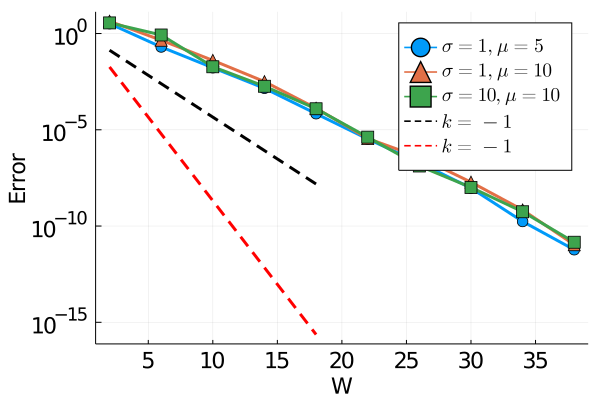

In [136]:
Plots.plot(vecEcW, data_gauss_gamma001, yaxis=:log, label=[L"\sigma=1,\mu=5" L"\sigma=1,\mu=10"  L"\sigma=10,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)
plot!(vecEcW[1:end-5], exp.(-vecEcW[1:end-5]), yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)
plot!(vecEcW[1:end-5], exp.(-2*vecEcW[1:end-5]), yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:red)

In [ ]:
Plots.savefig("2D_WconvergeWsetp4L20_diffgaussian_gamma001.png")

#### Select odd points 

In [105]:
oddvecEcW=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_gauss_sigma1mu5=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_gauss_sigma1mu10=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_gauss_sigma10mu10=zeros(Float64,Int((lengthW-1)/2))
for i=1:Int((lengthW-1)/2)
    oddvecEcW[i]=vecEcW[2*i-1]
    oddWerror_dosL20_gamma001_gauss_sigma1mu5[i]=Werror_dosL20_gamma001_gauss_sigma1mu5[2*i-1]
    oddWerror_dosL20_gamma001_gauss_sigma1mu10[i]=Werror_dosL20_gamma001_gauss_sigma1mu10[2*i-1]
    oddWerror_dosL20_gamma001_gauss_sigma10mu10[i]=Werror_dosL20_gamma001_gauss_sigma10mu10[2*i-1]
end
olddata_gauss_gamma001=[oddWerror_dosL20_gamma001_gauss_sigma1mu5,oddWerror_dosL20_gamma001_gauss_sigma1mu10,oddWerror_dosL20_gamma001_gauss_sigma10mu10];

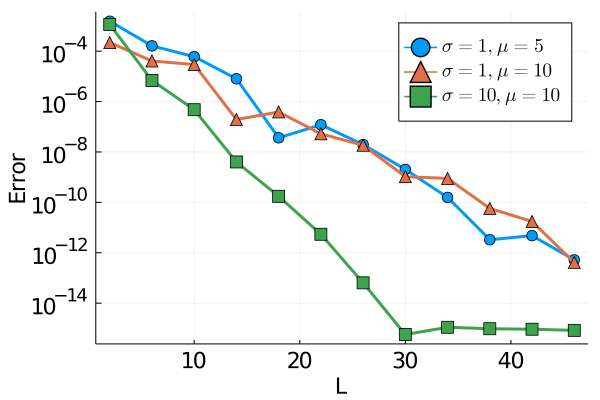

In [124]:
Plots.plot(oldvecEcW, olddata_gauss_gamma001, yaxis=:log, label=[L"\sigma=1,\mu=5" L"\sigma=1,\mu=10"  L"\sigma=10,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)

In [125]:
Plots.savefig("2D_WconvergeWsetp4L20_diffgaussian_gamma001_oddpoints.png")

### different Fermi test functions

In [ ]:
Werror_dosL20_gamma001_fermi_beta1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma001_fermi_beta1mu5[i]=abs(dos_L20W50_gamma001_fermi_beta1mu5-dos_gamma001_fermi_beta1mu5[i])
end 

In [ ]:
Werror_dosL20_gamma001_fermi_beta1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma001_fermi_beta1mu10[i]=abs(dos_L20W50_gamma001_fermi_beta1mu10-dos_gamma001_fermi_beta1mu10[i])
end 

In [ ]:
Werror_dosL20_gamma001_fermi_beta02mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma001_fermi_beta02mu10[i]=abs(dos_L20W50_gamma001_fermi_beta02mu10-dos_gamma001_fermi_beta02mu10[i])
end 

In [ ]:
data_fermi_gamma001=[Werror_dosL20_gamma001_fermi_beta1mu5,Werror_dosL20_gamma001_fermi_beta1mu10,Werror_dosL20_gamma001_fermi_beta02mu10];

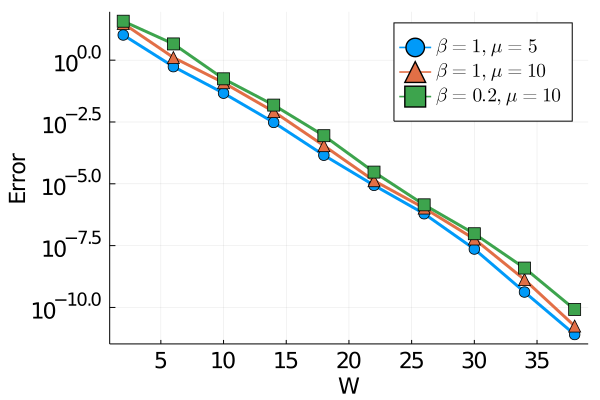

In [89]:
Plots.plot(vecEcW, data_fermi_gamma001, yaxis=:log, label=[L"\beta=1,\mu=5" L"\beta=1,\mu=10"  L"\beta=0.2,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [ ]:
Plots.savefig("2D_WconvergeWsetp4L20_difffermi_gamma001.png")

#### Select old points 

In [115]:
oddvecEcW=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_fermi_beta1mu5=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_fermi_beta1mu10=zeros(Float64,Int((lengthW-1)/2))
oddWerror_dosL20_gamma001_fermi_beta02mu10=zeros(Float64,Int((lengthW-1)/2))
for i=1:Int((lengthW-1)/2)
    oddvecEcW[i]=vecEcW[2*i-1]
    oddWerror_dosL20_gamma001_fermi_beta1mu5[i]=Werror_dosL20_gamma001_fermi_beta1mu5[2*i-1]
    oddWerror_dosL20_gamma001_fermi_beta1mu10[i]=Werror_dosL20_gamma001_fermi_beta1mu10[2*i-1]
    oddWerror_dosL20_gamma001_fermi_beta02mu10[i]=Werror_dosL20_gamma001_fermi_beta02mu10[2*i-1]
end
olddata_fermi_gamma001=[oddWerror_dosL20_gamma001_fermi_beta1mu5, oddWerror_dosL20_gamma001_fermi_beta1mu10,oddWerror_dosL20_gamma001_fermi_beta02mu10];

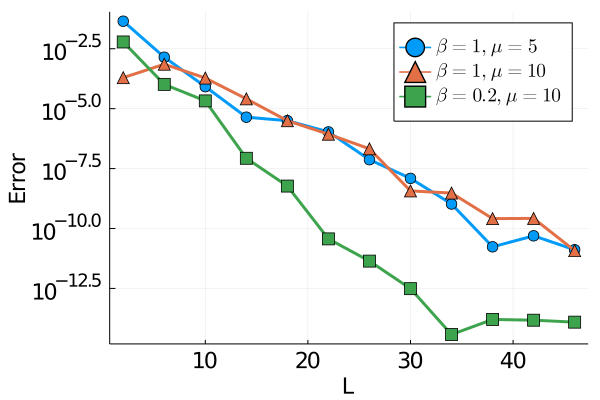

In [121]:
Plots.plot(oldvecEcW, olddata_fermi_gamma001, yaxis=:log,label=[L"\beta=1,\mu=5" L"\beta=1,\mu=10"  L"\beta=0.2,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)

In [122]:
Plots.savefig("2D_WconvergeWsetp4L20_difffermi_gamma001_oddpoints.png")

## $\gamma=0.05$ 

### different Gauss test function

In [64]:
Werror_dosL20_gamma005_gauss_sigma1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_gauss_sigma1mu5[i]=abs(dos_L20W50_gamma005_gauss_sigma1mu5-dos_gamma005_gauss_sigma1mu5[i])
end 

In [65]:
Werror_dosL20_gamma005_gauss_sigma1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_gauss_sigma1mu10[i]=abs(dos_L20W50_gamma005_gauss_sigma1mu10-dos_gamma005_gauss_sigma1mu10[i])
end 

In [66]:
Werror_dosL20_gamma005_gauss_sigma10mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_gauss_sigma10mu10[i]=abs(dos_L20W50_gamma005_gauss_sigma10mu10-dos_gamma005_gauss_sigma10mu10[i])
end 

In [67]:
data_gauss_gamma005=[Werror_dosL20_gamma005_gauss_sigma1mu5,Werror_dosL20_gamma005_gauss_sigma1mu10,Werror_dosL20_gamma005_gauss_sigma10mu10];

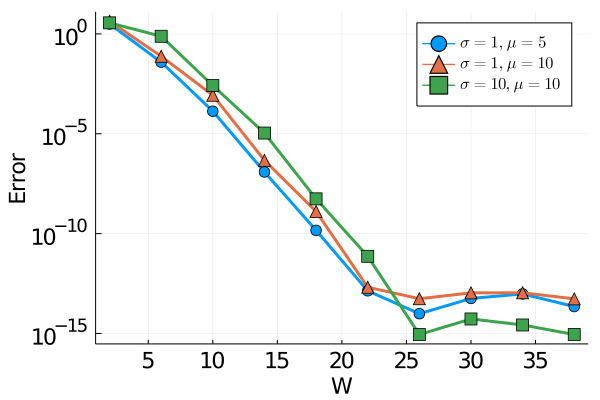

In [90]:
Plots.plot(vecEcW, data_gauss_gamma005, yaxis=:log, label=[L"\sigma=1,\mu=5" L"\sigma=1,\mu=10"  L"\sigma=10,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

### different Fermi test function 

In [113]:
Werror_dosL20_gamma005_fermi_beta1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_fermi_beta1mu5[i]=abs(dos_L20W50_gamma005_fermi_beta1mu5-dos_gamma005_fermi_beta1mu5[i])
end 

In [114]:
Werror_dosL20_gamma005_fermi_beta1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_fermi_beta1mu10[i]=abs(dos_L20W50_gamma005_fermi_beta1mu10-dos_gamma005_fermi_beta1mu10[i])
end 

In [115]:
Werror_dosL20_gamma005_fermi_beta02mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma005_fermi_beta02mu10[i]=abs(dos_L20W50_gamma005_fermi_beta02mu10-dos_gamma005_fermi_beta02mu10[i])
end 

In [116]:
data_fermi_gamma005=[Werror_dosL20_gamma005_fermi_beta1mu5,Werror_dosL20_gamma005_fermi_beta1mu10,Werror_dosL20_gamma005_fermi_beta02mu10];

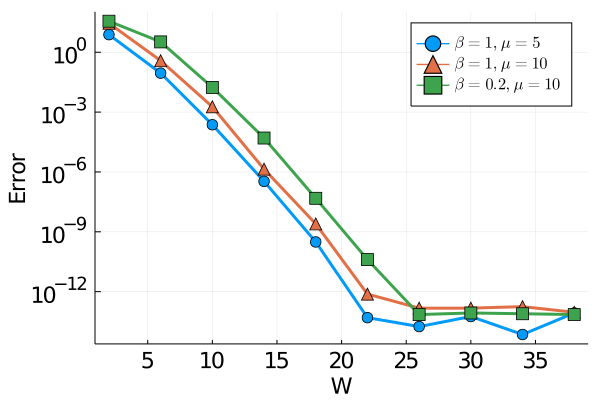

In [117]:
Plots.plot(vecEcW, data_fermi_gamma005, yaxis=:log, label=[L"\beta=1,\mu=5" L"\beta=1,\mu=10"  L"\beta=0.2,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

## $\gamma=0.1$

### different Gauss test function 

In [74]:
Werror_dosL20_gamma01_gauss_sigma1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_gauss_sigma1mu5[i]=abs(dos_L20W50_gamma01_gauss_sigma1mu5-dos_gamma01_gauss_sigma1mu5[i])
end 

In [75]:
Werror_dosL20_gamma01_gauss_sigma1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_gauss_sigma1mu10[i]=abs(dos_L20W50_gamma01_gauss_sigma1mu10-dos_gamma01_gauss_sigma1mu10[i])
end 

In [76]:
Werror_dosL20_gamma01_gauss_sigma10mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_gauss_sigma10mu10[i]=abs(dos_L20W50_gamma01_gauss_sigma10mu10-dos_gamma01_gauss_sigma10mu10[i])
end 

In [77]:
data_gauss_gamma01=[Werror_dosL20_gamma01_gauss_sigma1mu5,Werror_dosL20_gamma01_gauss_sigma1mu10,Werror_dosL20_gamma01_gauss_sigma10mu10];

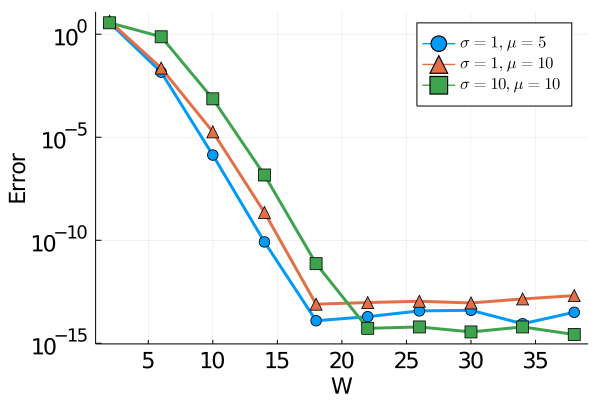

In [91]:
Plots.plot(vecEcW, data_gauss_gamma01, yaxis=:log, label=[L"\sigma=1,\mu=5" L"\sigma=1,\mu=10"  L"\sigma=10,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

### different Fermi test function 

In [ ]:
Werror_dosL20_gamma01_fermi_beta1mu5=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_fermi_beta1mu5[i]=abs(dos_L20W50_gamma01_fermi_beta1mu5-dos_gamma01_fermi_beta1mu5[i])
end 

In [ ]:
Werror_dosL20_gamma01_fermi_beta1mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_fermi_beta1mu10[i]=abs(dos_L20W50_gamma01_fermi_beta1mu10-dos_gamma01_fermi_beta1mu10[i])
end 

In [ ]:
Werror_dosL20_gamma01_fermi_beta02mu10=zeros(Float64,lengthW)
for i=1:lengthW
    Werror_dosL20_gamma01_fermi_beta02mu10[i]=abs(dos_L20W50_gamma01_fermi_beta02mu10-dos_gamma01_fermi_beta02mu10[i])
end 

In [ ]:
data_fermi_gamma01=[Werror_dosL20_gamma01_fermi_beta1mu5,Werror_dosL20_gamma01_fermi_beta1mu10,Werror_dosL20_gamma01_fermi_beta02mu10];

In [122]:
for i=1:lengthW
    if Werror_dosL20_gamma01_fermi_beta1mu5[i]==0
       Werror_dosL20_gamma01_fermi_beta1mu5[i]=1e-15
    end
end

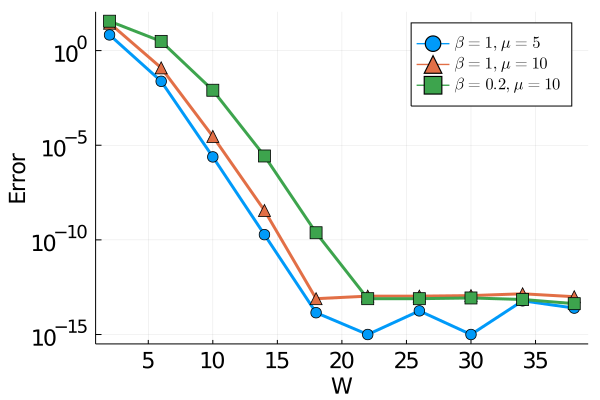

In [123]:
Plots.plot(vecEcW, data_fermi_gamma01, yaxis=:log, label=[L"\beta=1,\mu=5" L"\beta=1,\mu=10"  L"\beta=0.2,\mu=10"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

## Compare differrent gamma $\gamma$ 

### Gauss test function $\sigma=1$, $\mu=5$

In [100]:
data_diffgamma_gauss_sigma1mu5=[Werror_dosL20_gamma001_fermi_beta1mu5,Werror_dosL20_gamma005_fermi_beta1mu5,Werror_dosL20_gamma01_fermi_beta1mu5];

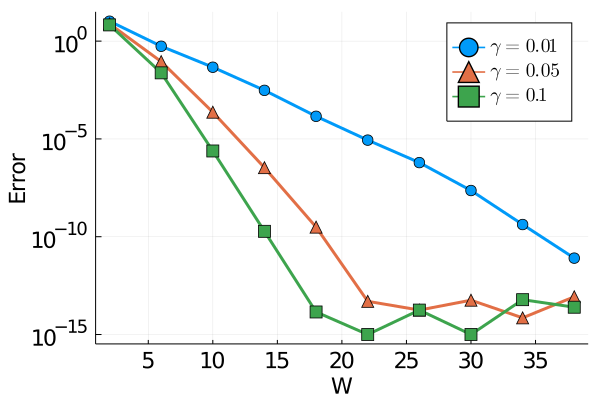

In [102]:
Plots.plot(vecEcW, data_diffgamma_gauss_sigma1mu5, yaxis=:log, label=[L"\gamma=0.01" L"\gamma=0.05"  L"\gamma=0.1"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [103]:
Plots.savefig("2D_WconvergeWsetp4L20_diffgamma_gauss_sigma1mu5.png")

#### Select old points 

In [159]:
oldvecEcL=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma001_gauss_sigma1mu5=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma005_gauss_sigma1mu5=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma01_gauss_sigma1mu5=zeros(Float64,Int((lengthL-1)/2))
for i=1:Int((lengthL-1)/2)
    oldvecEcL[i]=vecEcL[2*i-1]
    oldshiftedLerror_dosW5_gamma001_gauss_sigma1mu5[i]=shiftedLerror_dosW5_gamma001_gauss_sigma1mu5[2*i-1]
    oldshiftedLerror_dosW5_gamma005_gauss_sigma1mu5[i]=shiftedLerror_dosW5_gamma005_gauss_sigma1mu5[2*i-1]
    oldshiftedLerror_dosW5_gamma01_gauss_sigma1mu5[i]=shiftedLerror_dosW5_gamma01_gauss_sigma1mu5[2*i-1]
end
olddata_diffgamma_gauss_sigma1mu5=[oldshiftedLerror_dosW5_gamma001_gauss_sigma1mu5,oldshiftedLerror_dosW5_gamma005_gauss_sigma1mu5,oldshiftedLerror_dosW5_gamma01_gauss_sigma1mu5];

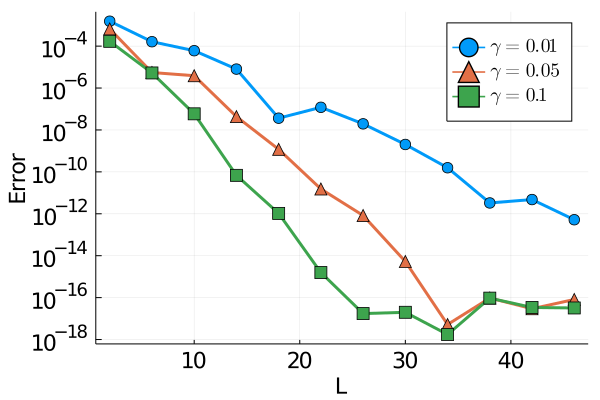

In [171]:
Plots.plot(oldvecEcL, olddata_diffgamma_gauss_sigma1mu5, yaxis=:log, label=[L"\gamma=0.01" L"\gamma=0.05"  L"\gamma=0.1"],  
     xlabel="L", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)

In [172]:
Plots.savefig("2DshiftedH_LconvergeLratio1p1_diffgamma_nk5_gauss_sigma1mu5_W5.png")

### Fermi test function $\beta=1$, $\mu=5$

In [124]:
data_diffgamma_fermi_beta1mu5=[Werror_dosL20_gamma001_fermi_beta1mu5, Werror_dosL20_gamma005_fermi_beta1mu5, Werror_dosL20_gamma01_fermi_beta1mu5];

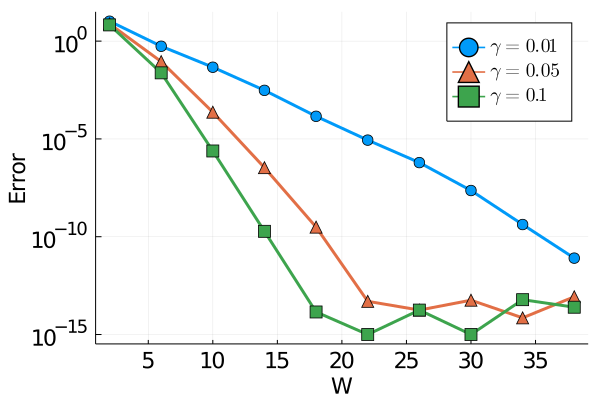

In [125]:
Plots.plot(vecEcW, data_diffgamma_fermi_beta1mu5, yaxis=:log, label=[L"\gamma=0.01" L"\gamma=0.05"  L"\gamma=0.1"],  
     xlabel="W", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [107]:
Plots.savefig("2D_WconvergeWsetp4L20_diffgamma_fermi_beta1mu5.png")

#### Select old points 

In [161]:
oldvecEcL=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma001_fermi_beta1mu5=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma005_fermi_beta1mu5=zeros(Float64,Int((lengthL-1)/2))
oldshiftedLerror_dosW5_gamma01_fermi_beta1mu5=zeros(Float64,Int((lengthL-1)/2))
for i=1:Int((lengthL-1)/2)
    oldvecEcL[i]=vecEcL[2*i-1]
    oldshiftedLerror_dosW5_gamma001_fermi_beta1mu5[i]=shiftedLerror_dosW5_gamma001_fermi_beta1mu5[2*i-1]
    oldshiftedLerror_dosW5_gamma005_fermi_beta1mu5[i]=shiftedLerror_dosW5_gamma005_fermi_beta1mu5[2*i-1]
    oldshiftedLerror_dosW5_gamma01_fermi_beta1mu5[i]=shiftedLerror_dosW5_gamma01_fermi_beta1mu5[2*i-1]
end
olddata_diffgamma_fermi_beta1mu5=[oldshiftedLerror_dosW5_gamma001_fermi_beta1mu5,oldshiftedLerror_dosW5_gamma005_fermi_beta1mu5,oldshiftedLerror_dosW5_gamma01_fermi_beta1mu5];

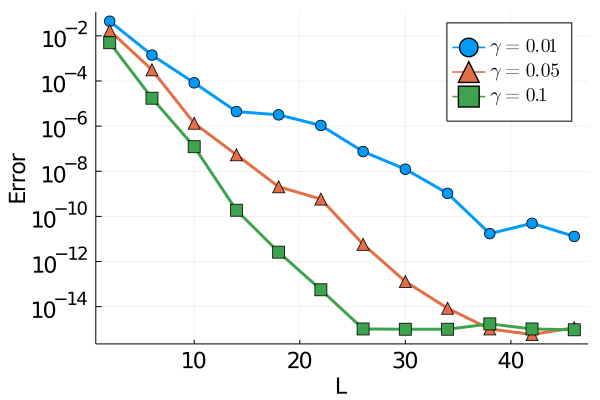

In [169]:
Plots.plot(oldvecEcL, olddata_diffgamma_fermi_beta1mu5, yaxis=:log, label=[L"\gamma=0.01" L"\gamma=0.05"  L"\gamma=0.1"],  
     xlabel="L", ylabel= "Error", ls=[:solid :solid :solid], 
 shape=[:circle :utriangle :rect], markersize=6, lw=3, tickfontsize=15, legendfontsize=13, guidefontsize=15)
#plot!(vecEcL[1:end-5], 0.65*vecEcL[1:end-5].^(-1), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [170]:
Plots.savefig("2DshiftedH_LconvergeLratio1p1_diffgamma_nk5_fermi_beta1mu5_W5.png")

In [37]:
h5open("2DshiftedEigenvalue_gamma005_L100W5_nk5.h5", "w") do file
  write(file,"λ_L100W5",λ, "Ψ_L100W5", Ψ, "zero_index",zero_index)
end

In [39]:
shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5=zeros(Float64,lengthL)
for i=1:lengthL
    shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5[i]=abs(dos_L100W5-dos[i])
end 

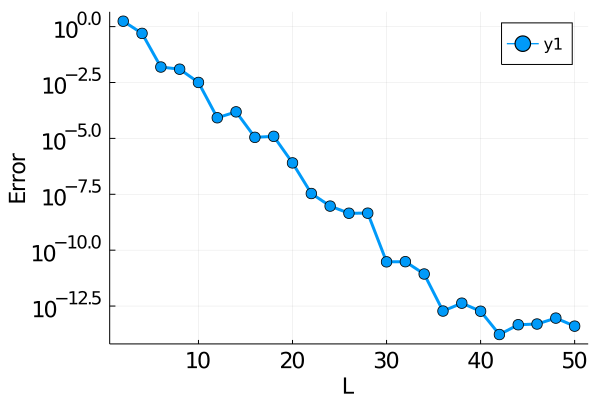

In [40]:
Plots.plot(vecEcL, shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5, yaxis=:log,
 xlabel="L", ylabel= "Error", ls=[:solid], 
 shape=[:circle], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL, 0.1*vecEcL.^(-1/2), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [44]:
shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5_2=zeros(Float64,lengthL)
for i=1:lengthL
    shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5_2[i]=abs(dos_L100W5overRS1RS2-dos_overRS1RS2[i])
end 

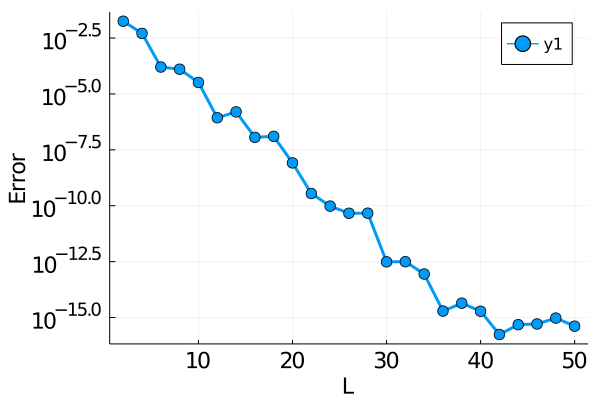

In [45]:
Plots.plot(vecEcL, shiftedLerror_dosW5_gamma005_Gauss_sigma1_mu_5_2, yaxis=:log,
 xlabel="L", ylabel= "Error", ls=[:solid], 
 shape=[:circle], markersize=6, lw=3, tickfontsize=15, legendfontsize=11, guidefontsize=15)
#plot!(vecEcL, 0.1*vecEcL.^(-1/2), xaxis=:log, yaxis=:log, label= L"k=-1", ls=:dash, lw=3, c=:black)

In [ ]:
    EcL =500
    EcW = 5.0
    neigs=10
    nfx =4* floor( Int, (2.0 * EcL) / norm(B1[:,1]) )    # 4* Gmax11
    nfy= 4* floor( Int, (2.0 * EcL) / norm(B1[:,2]) )    # 4* Gmax12
    #h = 2*EcW/nk
    #kpoint = range(-EcW, EcW-h, length=nk)
    kpts=[0.0 0.0;0.0 0.0]
    model = pwIncommensurate2D(EcL=EcL, EcW=EcW, kpts=kpts, n_fftwx=nfx, n_fftwy=nfy, n_eigs=neigs, γ=γ)    
        
    # hamiltonian
    H, G, Gmn, R, Gmax11,Gmax12,Gmax21,Gmax22=hamiltonian2d(atoms, model);
    #G : all coupled points [m,n] statisfy Ec
    #R : G_1m+G_2n   npw*1
    #λ = zeros(Float64, model.n_eigs, length(model.kpts))
    #λ = zeros(Float64, model.n_eigs)
    λ = zeros(Float64, size(H,1));
    D, Ψ = eigen(H);
    d_L500W5=zeros(Float64,length(D))
    for i=1:length(D)
        d_L500W5[i]=g(D[i])
    end

In [ ]:
h5open("2Deigenvalue_gamma005_L500W5.h5", "w") do file
  write(file,"D_L500W5",D, "Ψ_L500W5",Ψ)
end

In [ ]:
d_L500W5

In [ ]:
dos_L500W5=(1/EcL)*sum(d_L500W5)

In [ ]:
dos_L500W5_2=(1/EcL^2)*sum(d_L500W5)